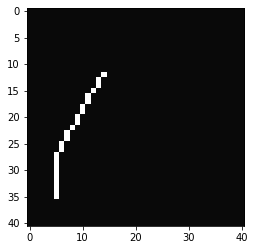

24 [(34, 5), (33, 5), (32, 5), (31, 5), (30, 5), (29, 5), (28, 5), (27, 5), (26, 6), (25, 6), (24, 7), (23, 7), (22, 8), (21, 9), (20, 9), (19, 10), (18, 10), (17, 11), (16, 11), (15, 12), (14, 13), (13, 13), (12, 14), (11, 14)]


In [13]:
import numpy as np
import math 
import random
from matplotlib import cm
import matplotlib.pyplot as plt
def magnitude(X):
  suma=0.
  for j in range(len(X)):
    suma+=pow(X[j],2)
  return math.sqrt(suma)
def nagrada(X_tminus1,X_t,X_final=X_fin,V_mag=V_mag):
    return ((magnitude(X_final-X_tminus1)-magnitude(X_final-X_t))/V_mag)
def def_variables():
    umax_x=0.9 # Трябва да е  максималната скорост на флуида
    umax_y=0.9
    V_ves=np.array([umax_x,umax_y]) # Скоросто на кораба спрямо скоростта на флуида
    V_mag=0.7
    X_begin=np.array([35,5]) 
    X_fin=np.array([10,15])
    Na = 8 # Брой акции
    return  V_ves, X_fin, X_begin, Na, V_mag
V_ves, X_fin, X_begin, Na, V_mag,=def_variables()
def take_action(V_ves,speed_x,speed_y,m,n,a,V_mag=V_mag,X_fin=X_fin):
    pos_actions=np.array([[1,0],[1,1],[0,1],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1]])
    action=np.array(pos_actions[a])
    m_t=int(round(m+(int(round(float(speed_x[m][n])+float(action[0])*float(V_ves[0]))))))

    n_t=int(round(n+(int(round(float(speed_y[m][n])+float(action[1])*float(V_ves[1]))))))
    
    X_tminus1, X_t = np.array([m,n]), np.array([m_t,n_t])

    #checks if we are at the final state or near it if we are terminates and gives big reward
    rewardat=0.
    if (X_fin[0]==m_t and X_fin[1]==n_t) or(X_fin[0]==m_t and X_fin[1]==n_t-1) or(X_fin[0]==m_t and X_fin[1]==n_t+1) or(X_fin[0]==m_t-1 and X_fin[1]==n_t) or(X_fin[0]==m_t+1 and X_fin[1]==n_t) or(X_fin[0]==m_t+1 and X_fin[1]==n_t+1) or(X_fin[0]==m_t+1 and X_fin[1]==n_t-1) or(X_fin[0]==m_t-1 and X_fin[1]==n_t-1) or (X_fin[0]==m_t-1 and X_fin[1]==n_t+1) :
        Terminal=True
        rewardat=100.
    #checks if we are the boundry terminates the episode because we are lost gives big punishment 
    elif m_t>40 or m_t<0 or n_t>40 or n_t<0 : #Последния or го махни ако ще ползва друг env
        Terminal=True
        m_t, n_t=m, n
        rewardat=-100.
    #else gives me the reward and does not terminate
    else:
        Terminal=False
        rewardat=float(nagrada(X_tminus1,X_t))
    return m_t,n_t,Terminal,rewardat
def trivial_policy(X_current,X_final=X_fin):
    Norm_vect=X_final-X_current
    Norm_vect=Norm_vect/magnitude(Norm_vect)
    Solution=X_current*1.
    Solution[:]+=Norm_vect[:]
    Solution[0]=int(round(Solution[0]))
    Solution[1]=int(round(Solution[1]))
    actions=np.array([[1,0],[1,1],[0,1],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1],[0,0]])
    differenec=Solution-X_current
    for j in range(8):
        if magnitude(actions[j]-differenec)==0:
            a=j
    return a
Terminal=False
X_current=X_begin.copy()
X_future=np.array([0,0])
actions_taken1=[]
zi=[0]
j=1
v = np.zeros((41, 41))
u = np.zeros((41, 41))
trajectories1 = np.zeros(shape=(41,41))
while not(Terminal or j>400):
    a=trivial_policy(X_current)
    X_future[0],X_future[1], Terminal, rewarda = take_action(V_ves,v,u,int(X_current[0]),int(X_current[1]),a)
    actions_taken1.append((X_future[0],X_future[1]))
    trajectories1[int(X_current[0])][int(X_current[1])] = trajectories1[int(X_current[0])][int(X_current[1])] + 950000/400
    X_current=X_future.copy()
    zi.append(zi[j-1]+rewarda)
    j+=1
plt.imshow(trajectories1, cmap='gray', vmin=-10, vmax=255)
plt.show()
print(len(actions_taken1),actions_taken1)